In [1]:
import matplotlib.pyplot as plt
import numpy as np

Funcția de activare (Sigmoid) și derivata ei

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

Date (XOR Problem - grea pentru un singur perceptron!)

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Labels: XOR logic

In [4]:
y = np.array([[0], [1], [1], [0]])


Inițializare

In [5]:
np.random.seed(42)
weights = np.random.uniform(-1, 1, (2, 1))  # 2 inputs -> 1 output
bias = 0
lr = 0.1

In [6]:
weights

array([[-0.25091976],
       [ 0.90142861]])

Bucla de antrenare (Backpropagation manual pentru 1 strat)

In [7]:
epochs = 5000
loss_history = []

for i in range(epochs):
    # Forward Pass
    # z = produs matriceal (Inputs, Ponderi) + Termen liber
    z = np.dot(X, weights) + bias
    # Activare
    predicted_output = sigmoid(z)

    # Calcularea erorii
    error = y - predicted_output
    loss_history.append(np.mean(np.abs(error)))

    # Backpropagation (Gradient Descent)
    # delta predicție = eroare * derivata funcției de activare
    d_predicted = error * sigmoid_derivative(predicted_output)

    # Update Weights and Bias
    weights += np.dot(X.T, d_predicted) * lr
    bias += np.sum(d_predicted) * lr

Rezultate

In [8]:
print(f"Final Weights:\n{weights}")
print(f"Final Bias:\n{bias}")
print(f"Final Predictions:\n{predicted_output}")

Final Weights:
[[5.86356090e-10]
 [5.86386807e-10]]
Final Bias:
-6.95519030536945e-10
Final Predictions:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


Vizualizare

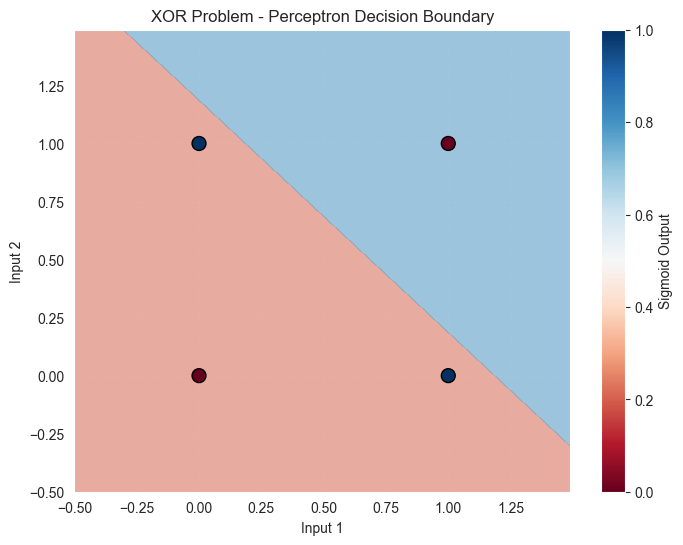

In [9]:
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Flatten grid and predict
    grid = np.c_[xx.ravel(), yy.ravel()]
    # z = dot(grid, weights) + bias
    z = np.dot(grid, weights) + bias
    Z = sigmoid(z)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    # Plot contour (decision boundary where prediction is 0.5)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdBu, edgecolors='k', s=100)
    plt.title("XOR Problem - Perceptron Decision Boundary")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.colorbar(label='Sigmoid Output')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

plot_decision_boundary(X, y, weights, bias)

Un singur strat nu poate rezolva XOR.
Această realitate exemplifică nevoia de algoritmi mai complecși, precum Multilayer Perceptron.

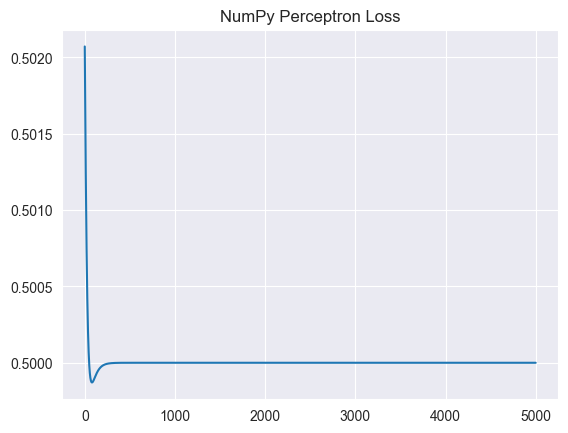

In [10]:
plt.plot(loss_history)
plt.title("NumPy Perceptron Loss")
plt.show()